In [1]:
import cv2
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fs = cv2.FileStorage()

In [3]:
fs.open("D:\\mhmodels_old\\models\\00955.yml.gz", cv2.FileStorage_READ)

True

In [4]:
depth_img = fs.getNode("depth_img").mat()

In [5]:
uv_space = fs.getNode("uv_space").mat()

In [6]:
segmentation = fs.getNode("segmentation").mat()

In [7]:
import numpy as np

In [8]:
np.max(depth_img)

1110

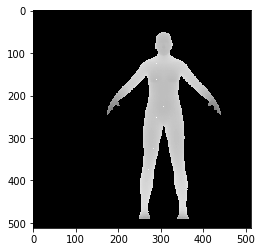

In [9]:
plt.imshow(depth_img, cmap='gray')

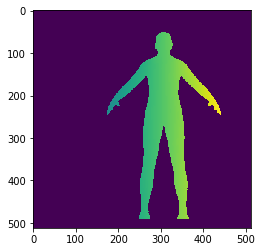

In [10]:
plt.imshow(uv_space[:,:, 0])

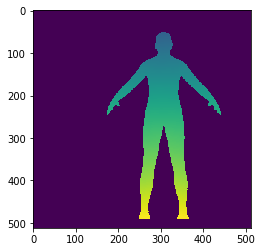

In [11]:
plt.imshow(uv_space[:,:, 1])

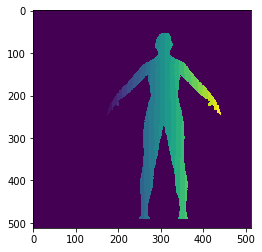

In [12]:
plt.imshow(segmentation[:,:, 0])

In [15]:
segmentation.shape

(512, 512, 2)

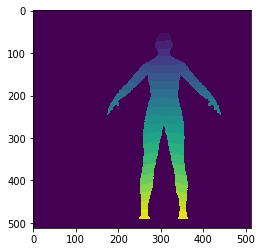

In [16]:
plt.imshow(segmentation[:,:, 1])

# Prepare data

In [49]:
NUM_OF_BINS = 20
IMG_WIDTH = 128
IMG_HEIGHT = 128

BATCH_SIZE = 32

N_CLASSES = NUM_OF_BINS + 1

In [50]:
# Try with horizontal segmetation first
segmentation[:, :, 0].shape # shape (512, 512) ==> want 262144 x N_CLASSES

(256, 256)

In [51]:
def get_segmentation_labels(data, width, height, n_classes):
    labels = np.zeros( (width, height, n_classes))
    
    for c in range(n_classes):
        labels[:, :, c] = (data == c).astype(int)
    
    labels = np.reshape(labels, (width * height, n_classes))
    return labels

In [52]:
test_labels = get_segmentation_labels(segmentation[:, :, 0], IMG_WIDTH, IMG_HEIGHT, N_CLASSES)

ValueError: could not broadcast input array from shape (256,256) into shape (128,128)

In [34]:
segmentation[300, 280, 0]

IndexError: index 300 is out of bounds for axis 0 with size 256

In [35]:
segmentation[300, 320, 0]

IndexError: index 300 is out of bounds for axis 0 with size 256

In [36]:
test_labels[300*512 + 320, 12]

IndexError: index 153920 is out of bounds for axis 0 with size 65536

# Preprocessing

In [37]:
list_paths = [line.strip() for line in open("D:\\mhmodels_hd\\list.txt")]

## Save depth_img & horizontal segmentation -> npy

In [53]:
for path in list_paths:
    yml_path = path + ".yml.gz"
    out_depth_path = path + "_depth.npy"
    out_h_seg_path = path + "_h_seg.npy"
    
    out_depth_png_path = path + "_depth_128.png"
    out_h_seg_png_path = path + "_h_seg_128.png"
    
    print("path", path)
    print("1", datetime.now())
    fs = cv2.FileStorage()
    fs.open(yml_path, cv2.FileStorage_READ)
    print("2", datetime.now())
    depth_img = fs.getNode("depth_img").mat()
    segmentation = fs.getNode("segmentation").mat()
    print("3", datetime.now())            
    depth_img = cv2.resize(depth_img, (IMG_WIDTH, IMG_HEIGHT))
    segmentation = cv2.resize(segmentation, (IMG_WIDTH, IMG_HEIGHT))
    
    h_seg_labels = get_segmentation_labels(segmentation[:, :, 0], IMG_WIDTH, IMG_HEIGHT, N_CLASSES)
    
    print(depth_img.shape)
    print(segmentation.shape)
    print(h_seg_labels.shape)
    print("4", datetime.now())
    
#     np.save(out_depth_path, depth_img)
#     np.save(out_h_seg_path, h_seg_labels)
    
    
    
    cv2.imwrite(out_depth_png_path, depth_img)
    cv2.imwrite(out_h_seg_png_path, h_seg_labels)
    
    print("-----")

path D:\mhmodels_old\models\00007
1 2018-03-02 15:38:50.202164
2 2018-03-02 15:38:50.385022
3 2018-03-02 15:38:50.385022
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:38:50.385022
-----
path D:\mhmodels_old\models\00015
1 2018-03-02 15:38:50.385022
2 2018-03-02 15:38:50.568514
3 2018-03-02 15:38:50.568514
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:38:50.584136
-----
path D:\mhmodels_old\models\00034
1 2018-03-02 15:38:50.715594
2 2018-03-02 15:38:50.900003
3 2018-03-02 15:38:50.900003
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:38:50.900003
-----
path D:\mhmodels_old\models\00036
1 2018-03-02 15:38:50.900003
2 2018-03-02 15:38:51.100879
3 2018-03-02 15:38:51.106407
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:38:51.111419
-----
path D:\mhmodels_old\models\00044
1 2018-03-02 15:38:51.140073
2 2018-03-02 15:38:51.331351
3 2018-03-02 15:38:51.335397
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:38:51.339397
-----
path D:\mhmodels_old\models\00046
1

3 2018-03-02 15:38:59.636322
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:38:59.639296
-----
path D:\mhmodels_old\models\00236
1 2018-03-02 15:38:59.644309
2 2018-03-02 15:38:59.860506
3 2018-03-02 15:38:59.865533
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:38:59.869532
-----
path D:\mhmodels_old\models\00238
1 2018-03-02 15:38:59.874046
2 2018-03-02 15:39:00.098138
3 2018-03-02 15:39:00.104189
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:00.107162
-----
path D:\mhmodels_old\models\00240
1 2018-03-02 15:39:00.112177
2 2018-03-02 15:39:00.288800
3 2018-03-02 15:39:00.288800
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:00.288800
-----
path D:\mhmodels_old\models\00249
1 2018-03-02 15:39:00.304430
2 2018-03-02 15:39:00.549470
3 2018-03-02 15:39:00.552932
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:00.552932
-----
path D:\mhmodels_old\models\00253
1 2018-03-02 15:39:00.552932
2 2018-03-02 15:39:00.742062
3 2018-03-02 15:39:00.746079
(128, 

2 2018-03-02 15:39:09.128659
3 2018-03-02 15:39:09.128659
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:09.128659
-----
path D:\mhmodels_old\models\00433
1 2018-03-02 15:39:09.144280
2 2018-03-02 15:39:09.313218
3 2018-03-02 15:39:09.313218
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:09.313218
-----
path D:\mhmodels_old\models\00434
1 2018-03-02 15:39:09.334144
2 2018-03-02 15:39:09.513217
3 2018-03-02 15:39:09.513217
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:09.528819
-----
path D:\mhmodels_old\models\00435
1 2018-03-02 15:39:09.528819
2 2018-03-02 15:39:09.744674
3 2018-03-02 15:39:09.744674
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:09.744674
-----
path D:\mhmodels_old\models\00436
1 2018-03-02 15:39:09.764850
2 2018-03-02 15:39:09.951670
3 2018-03-02 15:39:09.959189
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:09.962698
-----
path D:\mhmodels_old\models\00438
1 2018-03-02 15:39:09.966242
2 2018-03-02 15:39:10.145067
3 2018

-----
path D:\mhmodels_old\models\00661
1 2018-03-02 15:39:18.035014
2 2018-03-02 15:39:18.231465
3 2018-03-02 15:39:18.231465
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:18.253347
-----
path D:\mhmodels_old\models\00663
1 2018-03-02 15:39:18.260368
2 2018-03-02 15:39:18.483126
3 2018-03-02 15:39:18.489102
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:18.492110
-----
path D:\mhmodels_old\models\00667
1 2018-03-02 15:39:18.497123
2 2018-03-02 15:39:18.689376
3 2018-03-02 15:39:18.694357
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:18.697393
-----
path D:\mhmodels_old\models\00669
1 2018-03-02 15:39:18.702413
2 2018-03-02 15:39:18.909683
3 2018-03-02 15:39:18.914719
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:18.918243
-----
path D:\mhmodels_old\models\00671
1 2018-03-02 15:39:18.923748
2 2018-03-02 15:39:19.113287
3 2018-03-02 15:39:19.117835
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:19.121312
-----
path D:\mhmodels_old\models\0

2 2018-03-02 15:39:28.010904
3 2018-03-02 15:39:28.010904
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:28.010904
-----
path D:\mhmodels_old\models\00860
1 2018-03-02 15:39:28.026529
2 2018-03-02 15:39:28.229035
3 2018-03-02 15:39:28.233069
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:28.238058
-----
path D:\mhmodels_old\models\00863
1 2018-03-02 15:39:28.243095
2 2018-03-02 15:39:28.487254
3 2018-03-02 15:39:28.487254
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:28.487254
-----
path D:\mhmodels_old\models\00864
1 2018-03-02 15:39:28.487254
2 2018-03-02 15:39:28.707885
3 2018-03-02 15:39:28.711932
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:28.715908
-----
path D:\mhmodels_old\models\00867
1 2018-03-02 15:39:28.720920
2 2018-03-02 15:39:28.910926
3 2018-03-02 15:39:28.915940
(128, 128)
(128, 128, 2)
(16384, 21)
4 2018-03-02 15:39:28.918946
-----
path D:\mhmodels_old\models\00872
1 2018-03-02 15:39:28.924470
2 2018-03-02 15:39:29.158464
3 2018

# Data Generator

In [54]:
from datetime import datetime

In [55]:
def ImageGenerator(list_paths, batch_size, img_width, img_height, n_classes):
    
    list_data = itertools.cycle(list_paths)
    
    while True:
        X = []
        Y = []
        for _ in range(batch_size):
            path = next(list_data)
            depth_path = path + "_depth_128.png"
            h_seg_path = path + "_h_seg_128.png"
            
            depth_img = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)
            h_seg_labels = cv2.imread(h_seg_path, cv2.IMREAD_UNCHANGED)
            
            X.append(np.expand_dims(depth_img, 3))
            Y.append(h_seg_labels)        
        yield np.array(X), np.array(Y)

In [56]:
img_gen = ImageGenerator(list_paths, BATCH_SIZE, IMG_WIDTH, IMG_HEIGHT, N_CLASSES)

D:\Miniconda3\envs\env3-gpu\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  app.launch_new_instance()


(32, 256, 256, 1)
(32, 65536, 21)
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


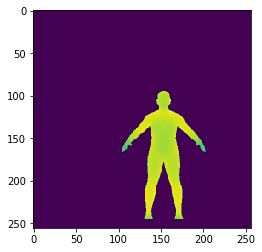

In [43]:
for x_train, y_train in img_gen:
    print(x_train.shape)
    print(y_train.shape)
    plt.imshow(np.squeeze(x_train[0, :, :]))
    print(y_train[0, 150*256 + 140, :])
    break

# Define model

In [57]:
import keras 
from keras import layers
from keras import backend as K

In [69]:
def get_model(img_width, img_height, n_classes):
    depth_input = layers.Input(shape=(img_width, img_height, 1), name='depth_input')
        
    # Block 1
    x = layers.Conv2D(64, 3, activation='relu', padding='same', name='block1_conv1')(depth_input)
    x = layers.Conv2D(64, 3, activation='relu', padding='same', name='block1_conv2')(x)
    x = layers.Conv2D(64, 3, strides=2, activation='relu', padding='same', name='block1_conv3')(x)
    f1 = x
    
#     # Block 2
#     x = layers.Conv2D(128, 3, activation='relu', padding='same', name='block2_conv1')(x)
#     x = layers.Conv2D(128, 3, activation='relu', padding='same', name='block2_conv2')(x)
#     x = layers.Conv2D(128, 3, strides=2, activation='relu', padding='same', name='block2_conv3')(x)
#     f2 = x
    
    # Block 3
    x = layers.Conv2D(256, 3, activation='relu', padding='same', name='block3_conv1')(x)
    x = layers.Conv2D(256, 3, activation='relu', padding='same', name='block3_conv2')(x)
    x = layers.Conv2D(256, 3, strides=2, activation='relu', padding='same', name='block3_conv3')(x)
    f3 = x
    
    o = f3
    
    o = layers.Conv2DTranspose(256, 4, strides=2, activation='relu', padding='same')(o) 
    o = layers.Conv2D(256, 3, activation='relu', padding='same')(o)
    o = layers.concatenate([o, f1], axis=3)
#     o = layers.Conv2DTranspose(256, 5, strides=2, activation='relu', padding='same')(o)
#     o = layers.Conv2D(256, 3, activation='relu', padding='same')(o)
    o = layers.Conv2DTranspose(256, 5, strides=2, activation='relu', padding='same')(o)
    o = layers.Conv2D(n_classes, 1, activation='softmax', padding='same')(o)
    
    o = layers.Reshape((img_width * img_height, n_classes))(o)
    
    model = keras.models.Model(depth_input, o)
    model.summary()
    return model

In [142]:
model = get_model(IMG_WIDTH, IMG_HEIGHT, N_CLASSES)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
depth_input (InputLayer)        (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 128, 128, 64) 640         depth_input[0][0]                
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 128, 128, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv3 (Conv2D)           (None, 64, 64, 64)   36928       block1_conv2[0][0]               
__________________________________________________________________________________________________
block3_con

In [135]:
# weighted pixelwisel loss function

In [143]:
from keras import backend as K
import tensorflow as tf

In [144]:
def weighted_pixelwise_crossentropy(class_weights):
    def loss(y_true, y_pred):
         # Copied and pasted from theano
#         y_pred = K.clip(y_pred, 10e-8, 1.0 - 10e-8)
#         return -K.mean(K.sum(K.prod(y_true * K.log(y_pred), class_weights)))
        y_pred = tf.clip_by_value(y_pred, 10e-8, 1. - 10e-8)
        return tf.reduce_mean(-tf.reduce_sum(tf.multiply(y_true * tf.log(y_pred), class_weights), 1))
    return loss

In [145]:
class_weights = [1.0]*N_CLASSES
class_weights[0] = 0.01
print(class_weights)

pixelwise_crossentropy = weighted_pixelwise_crossentropy(class_weights)

[0.01, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [146]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=pixelwise_crossentropy,
              metrics=['accuracy'])

In [158]:
epochs = 1
model.fit_generator(img_gen, steps_per_epoch=BATCH_SIZE*1, epochs=epochs)

Epoch 1/1


D:\Miniconda3\envs\env3-gpu\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  app.launch_new_instance()


32/32 [==============================] - 46s 1s/step - loss: 0.1078 - acc: 0.9990


In [159]:
model.save("D:\\model_segmentation_0.1078.h5")

D:\Miniconda3\envs\env3-gpu\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  app.launch_new_instance()


(32, 128, 128, 1)
(32, 16384, 21)
(32, 16384, 21)
----------------------------------
# 0
truth


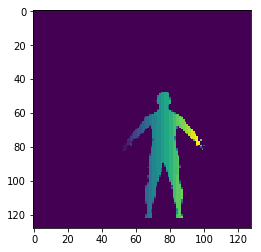

predict


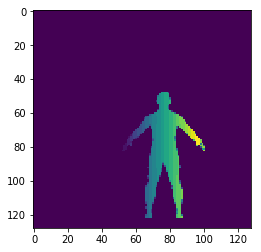

----------------------------------
# 1
truth


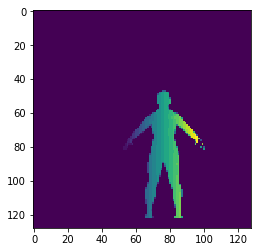

predict


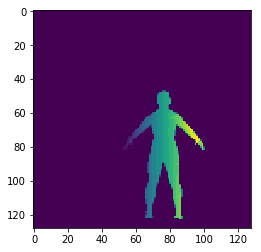

----------------------------------
# 2
truth


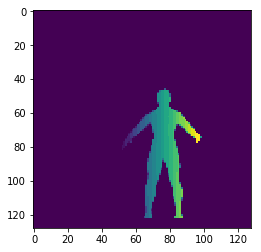

predict


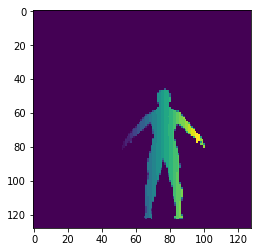

----------------------------------
# 3
truth


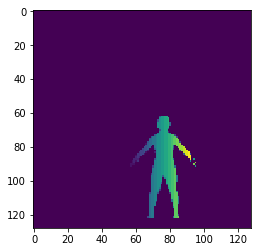

predict


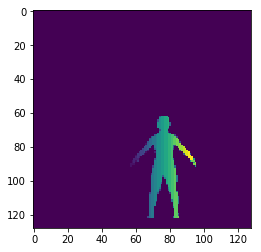

----------------------------------
# 4
truth


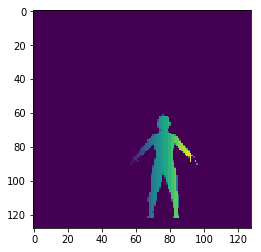

predict


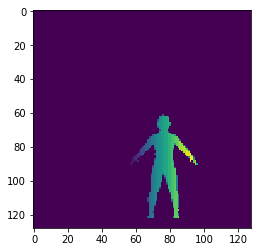

----------------------------------
# 5
truth


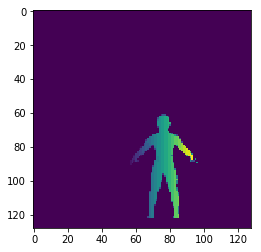

predict


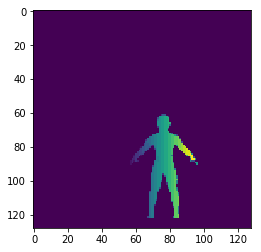

----------------------------------
# 6
truth


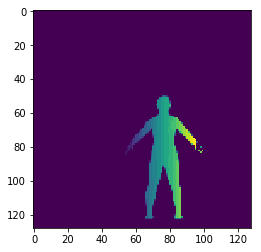

predict


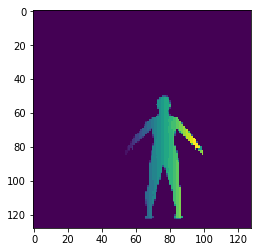

----------------------------------
# 7
truth


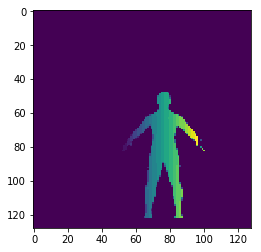

predict


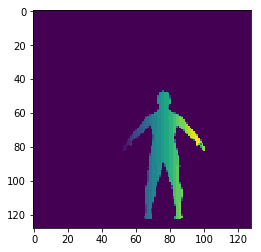

----------------------------------
# 8
truth


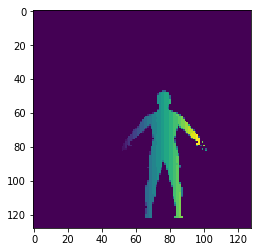

predict


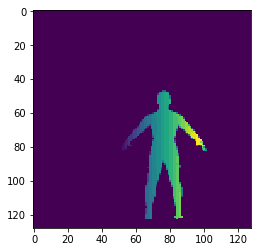

----------------------------------
# 9
truth


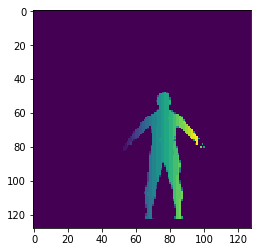

predict


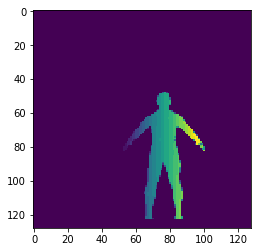

In [189]:
for x_train, y_train in img_gen:
    print(x_train.shape)
    print(y_train.shape)
    plt.imshow(np.squeeze(x_train[0, :, :]))
    results = model.predict(x_train[:, :, :, :])
    print(results.shape)
    
    for i in range(10):
        print("----------------------------------")
        print("#", i)
        y = y_train[i, :, :]
        y_pred = results[i, :, :]
        print("truth")
        y_reshape = np.reshape(y, (IMG_WIDTH, IMG_HEIGHT, 21))
        plt.imshow(np.argmax(y_reshape, axis=2))
        plt.show()

        print("predict")
        y_pred_reshape = np.reshape(y_pred, (IMG_WIDTH, IMG_HEIGHT, 21))
        plt.imshow(np.argmax(y_pred_reshape, axis=2))
        plt.show()
    break